In [2]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
print(police_killings.columns)
police_killings.head(5)

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [3]:
count_race = police_killings["raceethnicity"].value_counts()
type(count_race)
count_race

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

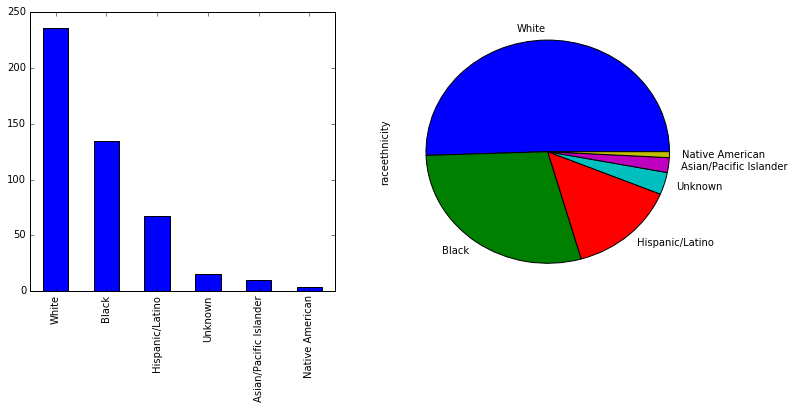

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
count_race.plot(kind="bar", ax=ax1)
count_race.plot(kind="pie", ax=ax2)
plt.show()

The bar and pie graph above show the ditribution of race among the people killed by the police. We can see that the white, the black and the Hispanic/Latino are the three major part. 

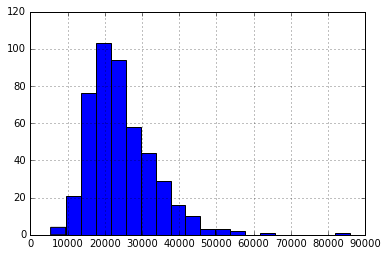

In [5]:
income = police_killings[police_killings["p_income"] != '-']["p_income"]
income = income.astype("int")
income.hist(bins=20)
plt.show()

In [6]:
state_pop = pd.read_csv("state_population.csv")
counts = police_killings["state_fp"].value_counts()

In [7]:
state_pop

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3
5,40,4,9,6,California,39144818,30023902,76.7
6,40,4,8,8,Colorado,5456574,4199509,77.0
7,40,1,1,9,Connecticut,3590886,2826827,78.7
8,40,3,5,10,Delaware,945934,741548,78.4
9,40,3,5,11,District of Columbia,672228,554121,82.4


In [8]:
states = pd.DataFrame({"STATE":counts.index, "shootings":counts})
states = state_pop.merge(states, on="STATE")
states

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings
0,40,3,6,1,Alabama,4858979,3755483,77.3,8
1,40,4,9,2,Alaska,738432,552166,74.8,2
2,40,4,8,4,Arizona,6828065,5205215,76.2,25
3,40,3,7,5,Arkansas,2978204,2272904,76.3,4
4,40,4,9,6,California,39144818,30023902,76.7,74
5,40,4,8,8,Colorado,5456574,4199509,77.0,12
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1
7,40,3,5,10,Delaware,945934,741548,78.4,2
8,40,3,5,11,District of Columbia,672228,554121,82.4,1
9,40,3,5,12,Florida,20271272,16166143,79.7,29


In [9]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]
states

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
0,40,3,6,1,Alabama,4858979,3755483,77.3,8,4.858979,1.646436
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
3,40,3,7,5,Arkansas,2978204,2272904,76.3,4,2.978204,1.343091
4,40,4,9,6,California,39144818,30023902,76.7,74,39.144818,1.890416
5,40,4,8,8,Colorado,5456574,4199509,77.0,12,5.456574,2.199182
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
7,40,3,5,10,Delaware,945934,741548,78.4,2,0.945934,2.114312
8,40,3,5,11,District of Columbia,672228,554121,82.4,1,0.672228,1.487591
9,40,3,5,12,Florida,20271272,16166143,79.7,29,20.271272,1.430596


In [10]:
sorted_states_1 = states.sort(columns="rate", ascending = False)
sorted_states_1

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
35,40,3,7,40,Oklahoma,3911338,2950017,75.4,22,3.911338,5.624674
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
27,40,2,4,31,Nebraska,1896190,1425853,75.2,6,1.896190,3.164240
11,40,4,9,15,Hawaii,1431603,1120770,78.3,4,1.431603,2.794071
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
12,40,4,8,16,Idaho,1654930,1222093,73.8,4,1.654930,2.417021
31,40,4,8,35,New Mexico,2085109,1588201,76.2,5,2.085109,2.397956
18,40,3,7,22,Louisiana,4670724,3555911,76.1,11,4.670724,2.355095
5,40,4,8,8,Colorado,5456574,4199509,77.0,12,5.456574,2.199182
7,40,3,5,10,Delaware,945934,741548,78.4,2,0.945934,2.114312


In [11]:
sorted_states_2 = states.sort(columns="rate", ascending=True)
sorted_states_2

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898
29,40,1,1,33,New Hampshire,1330608,1066610,80.2,1,1.330608,0.751536
19,40,1,1,23,Maine,1329328,1072948,80.7,1,1.329328,0.752260
13,40,2,3,17,Illinois,12859995,9901322,77.0,11,12.859995,0.855366
34,40,2,3,39,Ohio,11613423,8984946,77.4,10,11.613423,0.861073
45,40,2,3,55,Wisconsin,5771337,4476711,77.6,5,5.771337,0.866350


from the sorted rate of police killings per one million people in each state, we can find  that **Oklahoma** has the **most** police killings per million people while **Connecticut** has the **least**. 

In [12]:
pk = police_killings[police_killings.share_white != '-'][police_killings.share_black != '-'][police_killings.share_hispanic != '-']
pk

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068.0,48552,1.195996,4.0,4.0,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543.0,55909,1.190202,4.0,4.0,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391.0,38310,0.793292,2.0,1.0,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553.0,51667,0.862311,3.0,2.0,18.4,0.174167,0.102692


In [14]:
pk[["share_white", "share_black", "share_hispanic"]] = pk[["share_white", "share_black", "share_hispanic"]].astype(float)

In [17]:
lowest_10_states = sorted_states_2["STATE"][0:10].tolist()
highest_10_states = sorted_states_1["STATE"][0:10].tolist()

In [21]:
lowest_df = pk[pk["state_fp"].isin(lowest_10_states)]
highest_df = pk[pk["state_fp"].isin(highest_10_states)]
lowest_df

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
26,Andrew Toto,54,Male,White,January,21,2015,Scobie Pond Rd and Julian Rd,Derry,NH,...,1.9,32921,61167.0,77348,0.790803,1.0,4.0,5.4,0.087385,0.284854
31,Angelo West,41,Male,Black,March,27,2015,Humboldt Ave and Ruthven St,Roxbury,MA,...,35.2,14995,20388.0,53540,0.380799,1.0,1.0,41.3,0.220398,0.182336
35,Anthony Gomez Jr,29,Male,Black,May,19,2015,305 E Walnut St,Lancaster,PA,...,37.1,21868,42027.0,56483,0.744065,1.0,2.0,9.3,0.206855,0.172319
44,Autumn Steele,34,Female,White,January,6,2015,104 N Garfield Ave,Burlington,IA,...,6.8,15488,26964.0,42451,0.635179,1.0,1.0,26.3,0.105964,0.096565
53,Brandon Jones,18,Male,Black,March,19,2015,1077 Parkwood Dr,Cleveland,OH,...,0.1,14560,19643.0,43804,0.448429,1.0,1.0,32.8,0.204280,0.083227
89,Dalton Branch,51,Male,Black,May,26,2015,530 Stanley Ave,New York,NY,...,15.6,21344,34545.0,46085,0.749593,2.0,2.0,20.1,0.106880,0.109860
102,Darrin Langford,32,Male,Black,April,2,2015,12th Ave and Glenhurst Ct,Rock Island,IL,...,10.4,20610,37215.0,48702,0.764137,2.0,2.0,26.9,0.166844,0.207425
110,David Kassick,59,Male,White,February,2,2015,36 Grandview Rd,Hanover,PA,...,5.9,30491,65581.0,58745,1.116367,4.0,4.0,7.4,0.034011,0.267044


In [29]:
lowest_df[["share_white", "share_black", "share_hispanic"]].mean()

share_white       60.132727
share_black       21.610909
share_hispanic    12.994545
dtype: float64

In [31]:
highest_df[["share_white", "share_black", "share_hispanic"]].mean()

share_white       55.652174
share_black       11.532609
share_hispanic    20.693478
dtype: float64